# Feature Selection Methods

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


In [4]:
# Load the data
data = pd.read_csv('../1D_All_ReplaysData_PvP.csv')  # Replace with your actual file path

# Assuming combined_data is your DataFrame
data = data.drop(data[data['Winner'] == 0].index)
# Assuming df is your DataFrame and 'ReplayID' is the column to be encoded
label_encoder = LabelEncoder()
data['ReplayID_encoded'] = label_encoder.fit_transform(data['ReplayID'])
data['Player1_Race'] = label_encoder.fit_transform(data['ReplayID'])
data['Player2_Race'] = label_encoder.fit_transform(data['ReplayID'])
# data['Winner'] = label_encoder.fit_transform(data['Winner'])
data['MapName_encoded'] = label_encoder.fit_transform(data['MapName'])

# last_rows = data.groupby('ReplayID').tail(70).groupby('ReplayID').head(1)

# Calculate the 80th percentile of the 'Frame' column within each group of 'ReplayID'
percentile_80_grouped = data.groupby('ReplayID')['Frame'].quantile(0.8)

# Define a function to find the row with the closest 'Frame' value to the 80th percentile within each group
def find_nearest_row(group):
    nearest_index = (group['Frame'] - percentile_80_grouped[group.name]).abs().idxmin()
    return group.loc[[nearest_index]]

# Apply the function to each group of 'ReplayID' and concatenate the results
nearest_rows = data.groupby('ReplayID', group_keys=False).apply(find_nearest_row)

# Reset the index if needed
nearest_rows.reset_index(drop=True, inplace=True)

# Define features (X) and target variable (y)
X = nearest_rows.drop(['ReplayID', 'Winner','Player1_Race', 'Player2_Race', 'MapName'], axis=1)
y = nearest_rows['Winner']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42) # 70% training and 30% test

In [5]:
data.describe()

,Duration,Frame,MapWidth,MapHeight,Player1_EAPM,Player1_ECmdCount,Player1_Race,Player2_EAPM,Player2_ECmdCount,Player2_Race,...,Player2_Protoss Ground Armor_Level,Player2_Protoss Ground Weapons_Level,Player2_Protoss Plasma Shields_Level,Player2_Reaver Capacity_Level,Player2_Scarab Damage_Level,Player2_Sensor Array_Level,Player2_Singularity Charge_Level,Winner,ReplayID_encoded,MapName_encoded
count,118569.000000,118569.000000,118569.000000,118569.000000,118569.000000,118569.000000,118569.000000,118569.000000,118569.000000,118569.000000,...,118569.000000,118569.000000,118569.000000,118569.0,118569.000000,118569.000000,118569.000000,118569.000000,118569.000000,118569.000000
mean,42794.387142,19782.807479,121.656217,121.816394,177.999528,5215.032791,181.303486,174.424251,5091.385919,181.303486,...,0.366521,0.707774,0.149972,0.0,0.018057,0.004681,0.628233,1.490364,181.303486,86.645295
std,24838.546613,14558.809897,12.351401,12.634863,36.175322,2769.355877,108.520853,39.379766,2644.556391,108.520853,...,0.849257,1.102559,0.543602,0.0,0.133158,0.068256,0.483279,0.499909,108.520853,53.315676
min,5236.000000,0.000000,96.000000,96.000000,10.000000,154.000000,0.000000,5.000000,36.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,27254.000000,8100.000000,128.000000,128.000000,156.000000,3456.000000,85.000000,151.000000,3165.000000,85.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,85.000000,40.000000
50%,36911.000000,16900.000000,128.000000,128.000000,180.000000,4642.000000,183.000000,174.000000,4639.000000,183.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,183.000000,82.000000
75%,52794.000000,28400.000000,128.000000,128.000000,202.000000,6755.000000,283.000000,201.000000,6618.000000,283.000000,...,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,2.000000,283.000000,146.000000
max,209207.000000,64700.000000,128.000000,128.000000,303.000000,18855.000000,363.000000,285.000000,16347.000000,363.000000,...,3.000000,3.000000,3.000000,0.0,1.000000,1.000000,1.000000,2.000000,363.000000,171.000000


In [6]:
data.head()

,ReplayID,Duration,Frame,MapName,MapWidth,MapHeight,Player1_EAPM,Player1_ECmdCount,Player1_Race,Player2_EAPM,...,Player2_Protoss Ground Armor_Level,Player2_Protoss Ground Weapons_Level,Player2_Protoss Plasma Shields_Level,Player2_Reaver Capacity_Level,Player2_Scarab Damage_Level,Player2_Sensor Array_Level,Player2_Singularity Charge_Level,Winner,ReplayID_encoded,MapName_encoded
0,GG10042,28603,0,| iCCup | PeaksOfBeakdu,96,128,168,3360,1,187,...,0,0,0,0,0,0,0,2,1,163
1,GG10042,28603,100,| iCCup | PeaksOfBeakdu,96,128,168,3360,1,187,...,0,0,0,0,0,0,0,2,1,163
2,GG10042,28603,200,| iCCup | PeaksOfBeakdu,96,128,168,3360,1,187,...,0,0,0,0,0,0,0,2,1,163
3,GG10042,28603,300,| iCCup | PeaksOfBeakdu,96,128,168,3360,1,187,...,0,0,0,0,0,0,0,2,1,163
4,GG10042,28603,400,| iCCup | PeaksOfBeakdu,96,128,168,3360,1,187,...,0,0,0,0,0,0,0,2,1,163


In [7]:
# get last row of each replay
single_replays = data.groupby('ReplayID').last()

In [9]:
# Create feature and target variable for Classification problem
X_clf=data.iloc[:,1:-1] # features: SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'
y_clf=data.iloc[:,-1] # Target variable: Iris species

In [39]:
selector=SelectKBest(score_func=chi2,k=60)
selector.fit(X,y)

SelectKBest(k=60, score_func=<function chi2 at 0x000001BC80043E50>)

In [40]:
# Get columns to keep and create new dataframe with those only
cols_idxs = selector.get_support(indices=True)
features_df_new = X.iloc[:,cols_idxs]

In [41]:
features_df_new.head()

,Duration,Frame,Player1_ECmdCount,Player2_ECmdCount,Player1_TotalUnits,Player1_AliveUnits,Player1_DestroyedUnits,Player1_Alive_Protoss Nexus,Player1_Alive_Protoss Probe,Player1_Alive_Protoss Arbiter,...,Player1_LostInAttackGas,Player2_LostInAttackMinerals,Player2_LostInAttackGas,Player1_TotalLostMinerals,Player2_TotalLostMinerals,Player1_TotalLostGas,Player2_TotalLostGas,Player2_Protoss Air Weapons_Level,ReplayID_encoded,MapName_encoded
0,20568,16400,2001,1509,124,65,59,3,36,0,...,0,0,0,200,125,0,50,0,0,80
1,28603,22800,3360,3743,183,82,101,3,40,0,...,0,0,0,0,425,0,450,0,1,163
2,34851,27800,4434,4161,247,29,218,1,1,0,...,0,0,0,5150,6000,1825,2500,0,2,162
3,37973,30300,3896,4461,295,121,174,5,64,0,...,0,0,0,12050,14050,5025,4075,0,3,70
4,38455,30700,4463,4065,289,94,195,4,31,0,...,0,0,0,12125,10550,2850,3275,0,4,85


# Random Forest on Selected Features

In [43]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_df_new, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier (you can choose other classifiers as well)
clf = RandomForestClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.82
              precision    recall  f1-score   support

           1       0.76      0.91      0.83        35
           2       0.90      0.74      0.81        38

    accuracy                           0.82        73
   macro avg       0.83      0.83      0.82        73
weighted avg       0.84      0.82      0.82        73



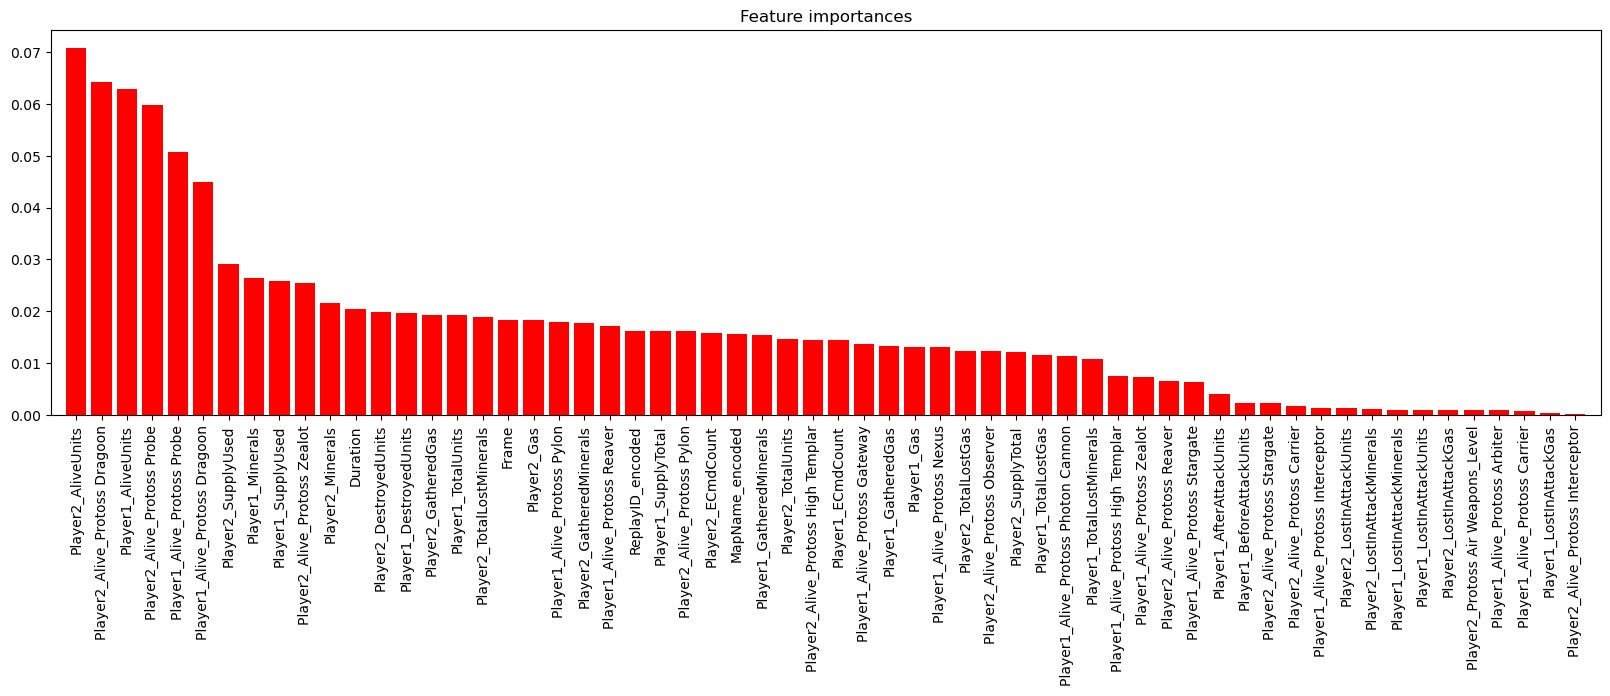

In [44]:
#Plot feature importance
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(20, 5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

### Function to get the best number of features

In [31]:
acc = {}

def test_kbest(n):
    selector=SelectKBest(score_func=chi2,k=n)
    selector.fit(X,y)   
    # Get columns to keep and create new dataframe with those only
    cols_idxs = selector.get_support(indices=True)
    features_df_new = X.iloc[:,cols_idxs]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features_df_new, y, test_size=0.2, random_state=42)

    # Initialize the RandomForestClassifier (you can choose other classifiers as well)
    clf = RandomForestClassifier(random_state=42)

    # Train the model
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')

    # Display classification report
    # print(classification_report(y_test, y_pred))
    # Perform cross-validation
    cv_scores = cross_val_score(clf, features_df_new, y, cv=10)  # You can adjust the number of folds (cv parameter) as needed

    # Print cross-validation scores
    print("Cross-validation scores:", cv_scores)

    # Calculate and print the mean accuracy and standard deviation of the cross-validation scores
    print("Mean accuracy:",n, cv_scores.mean())

    acc[n] = cv_scores.mean()

for i in range(1, 155, 5):
    test_kbest(i)

Accuracy: 0.55
Cross-validation scores: [0.62162162 0.54054054 0.56756757 0.51351351 0.52777778 0.44444444
 0.52777778 0.44444444 0.66666667 0.47222222]
Mean accuracy: 1 0.5326576576576577
Accuracy: 0.52
Cross-validation scores: [0.37837838 0.56756757 0.56756757 0.54054054 0.55555556 0.41666667
 0.55555556 0.55555556 0.61111111 0.5       ]
Mean accuracy: 6 0.52484984984985
Accuracy: 0.56
Cross-validation scores: [0.54054054 0.62162162 0.56756757 0.62162162 0.63888889 0.44444444
 0.77777778 0.75       0.47222222 0.61111111]
Mean accuracy: 11 0.6045795795795795
Accuracy: 0.56
Cross-validation scores: [0.59459459 0.59459459 0.48648649 0.7027027  0.69444444 0.44444444
 0.66666667 0.69444444 0.61111111 0.5       ]
Mean accuracy: 16 0.598948948948949
Accuracy: 0.68
Cross-validation scores: [0.64864865 0.75675676 0.64864865 0.67567568 0.77777778 0.63888889
 0.77777778 0.69444444 0.66666667 0.75      ]
Mean accuracy: 21 0.7035285285285287
Accuracy: 0.78
Cross-validation scores: [0.81081081 0.8

In [33]:
acc

{1: 0.5326576576576577,
 6: 0.52484984984985,
 11: 0.6045795795795795,
 16: 0.598948948948949,
 21: 0.7035285285285287,
 26: 0.804954954954955,
 31: 0.8295795795795795,
 36: 0.83490990990991,
 41: 0.8295045045045045,
 46: 0.8268018018018019,
 51: 0.846096096096096,
 56: 0.849024024024024,
 61: 0.8323573573573574,
 66: 0.856906906906907,
 71: 0.8325825825825826,
 76: 0.8462462462462463,
 81: 0.8432432432432432,
 86: 0.8488738738738737,
 91: 0.8487987987987987,
 96: 0.8461711711711711,
 101: 0.8213963963963964,
 106: 0.8541291291291291,
 111: 0.83490990990991,
 116: 0.8403903903903904,
 121: 0.8490990990990991,
 126: 0.8322822822822824,
 131: 0.83490990990991,
 136: 0.8324324324324325,
 141: 0.8436186186186185,
 146: 0.8242492492492491,
 151: 0.837987987987988}

In [32]:
max(acc, key=acc.get)

66

In [48]:
acc[56]

0.849024024024024

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cross-validation scores: [0.89189189 0.94594595 0.78378378 0.75675676 0.94444444 0.75
 0.83333333 0.88888889 0.88888889 0.80555556]
Mean accuracy: 0.848948948948949
Standard deviation of accuracy: 0.06944489083534801


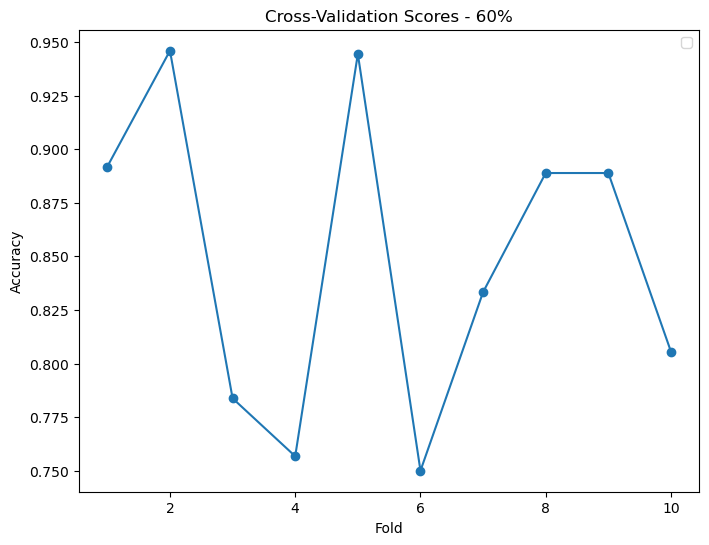

In [49]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(clf, features_df_new, y, cv=10)  # You can adjust the number of folds (cv parameter) as needed

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation of accuracy:", cv_scores.std())
cv_scores60 = cv_scores
# Plot cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores - 60%')
plt.legend()
plt.show()


# Feature Selection On Combined Dataset

In [3]:
# Load the data
data = pd.read_csv('../Processed Datasets/StarCraft_Combined_Dataset.csv')  # Replace with your actual file path

# Assuming combined_data is your DataFrame
data = data.drop(data[data['Winner'] == 0].index)

data = data.drop(data[data['Winner'] > 2].index)
# Assuming df is your DataFrame and 'ReplayID' is the column to be encoded
label_encoder = LabelEncoder()
data['ReplayID_encoded'] = label_encoder.fit_transform(data['ReplayID'])
data['Player1_Race'] = label_encoder.fit_transform(data['ReplayID'])
data['Player2_Race'] = label_encoder.fit_transform(data['ReplayID'])
data['Winner'] = label_encoder.fit_transform(data['Winner'])
data['MapName_encoded'] = label_encoder.fit_transform(data['MapName'])

# last_rows = data.groupby('ReplayID').tail(70).groupby('ReplayID').head(1)

# Calculate the 80th percentile of the 'Frame' column within each group of 'ReplayID'
percentile_80_grouped = data.groupby('ReplayID')['Frame'].quantile(0.8)

# Define a function to find the row with the closest 'Frame' value to the 80th percentile within each group
def find_nearest_row(group):
    nearest_index = (group['Frame'] - percentile_80_grouped[group.name]).abs().idxmin()
    return group.loc[[nearest_index]]

# Apply the function to each group of 'ReplayID' and concatenate the results
nearest_rows = data.groupby('ReplayID', group_keys=False).apply(find_nearest_row)

# Reset the index if needed
nearest_rows.reset_index(drop=True, inplace=True)

# Define features (X) and target variable (y)
X = nearest_rows.drop(['ReplayID', 'Winner','Player1_Race', 'Player2_Race', 'MapName'], axis=1)
y = nearest_rows['Winner']

In [11]:
y.value_counts()

Winner
1    1143
0    1090
Name: count, dtype: int64

In [12]:
acc = {}

def test_kbest(n):
    selector=SelectKBest(score_func=chi2,k=n)
    selector.fit(X,y)   
    # Get columns to keep and create new dataframe with those only
    cols_idxs = selector.get_support(indices=True)
    features_df_new = X.iloc[:,cols_idxs]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features_df_new, y, test_size=0.2, random_state=42)

    # Initialize the RandomForestClassifier (you can choose other classifiers as well)
    clf = RandomForestClassifier(random_state=42)

    # Train the model
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')

    # Display classification report
    # print(classification_report(y_test, y_pred))
    # Perform cross-validation
    cv_scores = cross_val_score(clf, features_df_new, y, cv=10)  # You can adjust the number of folds (cv parameter) as needed

    # Print cross-validation scores
    print("Cross-validation scores:", cv_scores)

    # Calculate and print the mean accuracy and standard deviation of the cross-validation scores
    print("Mean accuracy:",n, cv_scores.mean())

    acc[n] = cv_scores.mean()

for i in range(1, 155, 5):
    test_kbest(i)

Accuracy: 0.50
Cross-validation scores: [0.49553571 0.52232143 0.54017857 0.50672646 0.52914798 0.52017937
 0.46636771 0.5426009  0.52017937 0.50672646]
Mean accuracy: 1 0.5149963965406791
Accuracy: 0.49
Cross-validation scores: [0.5        0.48214286 0.54910714 0.52017937 0.53363229 0.55605381
 0.53363229 0.49327354 0.53811659 0.56950673]
Mean accuracy: 6 0.527564461883408
Accuracy: 0.64
Cross-validation scores: [0.6875     0.62053571 0.68303571 0.69058296 0.71300448 0.65022422
 0.60538117 0.49327354 0.60089686 0.65022422]
Mean accuracy: 11 0.6394658872517616
Accuracy: 0.65
Cross-validation scores: [0.71875    0.66964286 0.69642857 0.75336323 0.76681614 0.68161435
 0.61434978 0.55156951 0.58744395 0.69058296]
Mean accuracy: 16 0.6730561338885329
Accuracy: 0.71
Cross-validation scores: [0.78571429 0.70982143 0.73214286 0.8161435  0.78026906 0.75784753
 0.65919283 0.60538117 0.6367713  0.73991031]
Mean accuracy: 21 0.7223194266495836
Accuracy: 0.70
Cross-validation scores: [0.77232143 0

In [24]:
acc[61]

0.7375300288276746

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cross-validation scores: [0.78873239 0.78521127 0.82394366 0.75352113 0.80633803 0.75352113
 0.66901408 0.65724382 0.69964664 0.74911661]
Mean accuracy: 0.7486288757278654
Standard deviation of accuracy: 0.05393174966231191


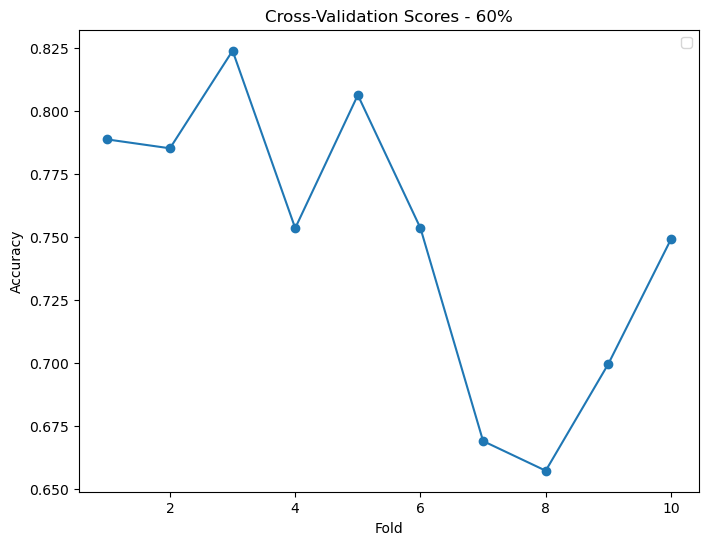

In [22]:
from sklearn.model_selection import cross_val_score

selector=SelectKBest(score_func=chi2,k=61)
selector.fit(X,y)   
# Get columns to keep and create new dataframe with those only
cols_idxs = selector.get_support(indices=True)
features_df_new = X.iloc[:,cols_idxs]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_df_new, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier (you can choose other classifiers as well)
clf = RandomForestClassifier(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(clf, features_df_new, y, cv=10)  # You can adjust the number of folds (cv parameter) as needed

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation of accuracy:", cv_scores.std())
cv_scores60 = cv_scores
# Plot cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores - 60%')
plt.legend()
plt.show()


c:\Users\abhin\anaconda3\envs\DevelopmentEnv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 15  34  62  81 143 152 156 157 158 159 165 179 194 196 197 198 199 205
 234 253 275 312 340 341 342 343] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\abhin\anaconda3\envs\DevelopmentEnv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


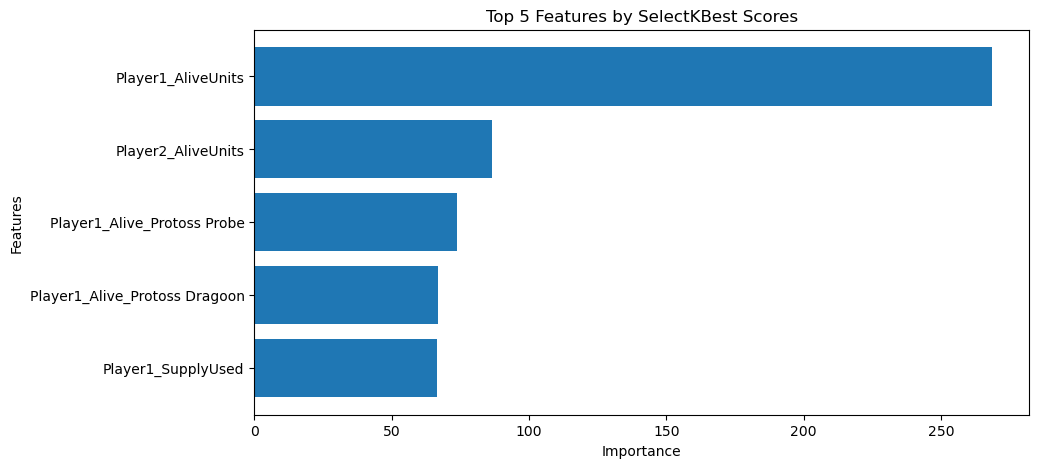

In [85]:
from sklearn.feature_selection import SelectKBest, f_classif

# Apply SelectKBest class to extract top 20 features
bestfeatures = SelectKBest(score_func=f_classif, k=20)
fit = bestfeatures.fit(X, y)

# Get the scores
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concat two dataframes for better visualization and sort them
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']
featureScores = featureScores.sort_values(by='Score', ascending=False).head(5)

# Plotting the bar graph
plt.figure(figsize=(10, 5))
plt.barh(featureScores['Feature'], featureScores['Score'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 5 Features by SelectKBest Scores')
# Sorting the features in increasing
plt.gca().invert_yaxis()
plt.show()

In [19]:
features_df_new

,Duration,Frame,Player1_EAPM,Player1_ECmdCount,Player2_ECmdCount,Player1_TotalUnits,Player1_AliveUnits,Player1_DestroyedUnits,Player1_Alive_Protoss Nexus,Player1_Alive_Protoss Probe,...,Player1_TotalLostGas,Player2_TotalLostGas,Player1_Alive_Terran Goliath,Player1_Alive_Terran Missile Turret,Player1_Alive_Terran Siege Tank Tank Mode,Player1_Alive_Terran Vulture,Player1_Alive_Zerg Larva,Player2_Alive_Terran Marine,Player2_Alive_Terran Missile Turret,Player2_Alive_Terran Siege Tank Tank Mode
0,20568,16400,140,2001,1509,124,65,59,3,36,...,0,50,0,0,0,0,0,0,0,0
1,64054,51200,127,5706,5738,41,20,21,0,0,...,0,0,0,0,0,0,0,0,0,0
2,29237,1300,152,3104,2999,9,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,58147,46500,175,7104,6240,394,25,369,0,0,...,2350,2650,1,2,1,0,0,0,2,2
4,9023,7100,115,721,970,35,26,9,0,0,...,0,0,0,0,0,0,20,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832,34624,27600,216,5225,5394,361,111,250,4,51,...,7850,8600,0,0,0,0,0,0,0,0
2833,49197,39300,151,5181,4128,176,27,149,0,15,...,1325,1350,0,0,0,0,0,0,0,0
2834,18951,15100,275,3633,1539,126,17,109,0,0,...,828,590,0,0,0,0,14,0,0,0
2835,36985,29500,205,5287,601,283,117,166,0,0,...,700,1300,3,14,17,2,0,0,0,0


## Information Gain

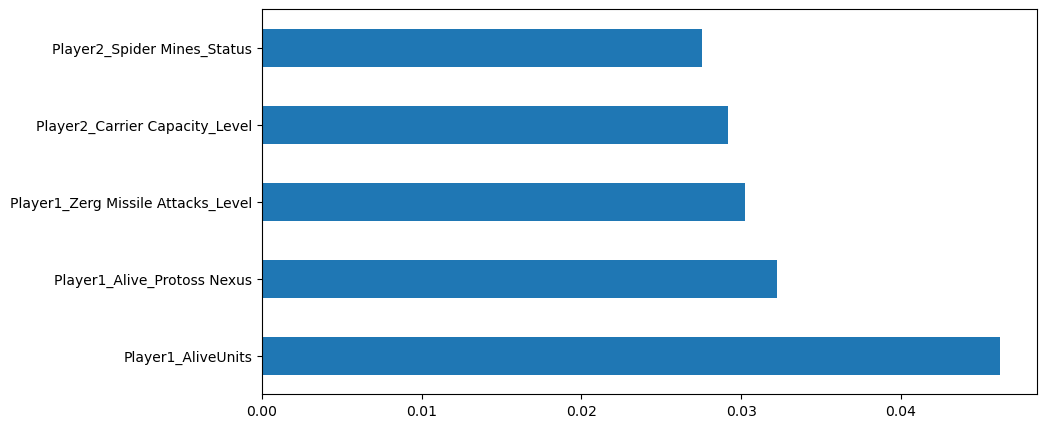

In [65]:
from sklearn.feature_selection import mutual_info_classif

importances = mutual_info_classif(X, y, random_state=42)

feat_importances = pd.Series(importances, X.columns)

# take the top 20 features
feat_importances = feat_importances.sort_values(ascending=False).head(5)

feat_importances.plot(kind="barh",figsize=(10, 5))

plt.show()

## Random Forest Feature Importance

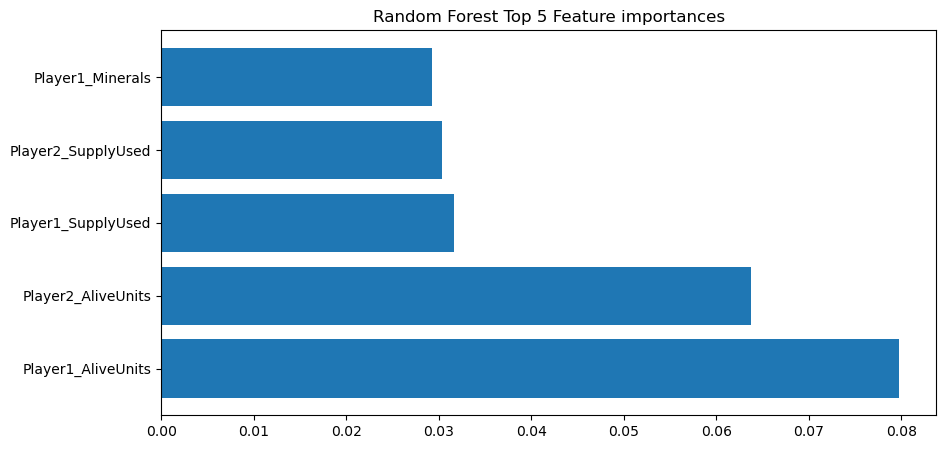

In [84]:
from sklearn.ensemble import RandomForestClassifier

# Random forest feature importance

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Get feature importances
importances = clf.feature_importances_

# Get the indices of the most important features
indices = np.argsort(importances)[::-1]

# Select and plot only top 5 features
plt.figure(figsize=(10, 5))
plt.title("Random Forest Top 5 Feature importances")
plt.barh(range(5), importances[indices][:5], align="center")
plt.yticks(range(5), X_train.columns[indices][:5])
plt.show()


## Mean Absolute Difference

C:\Users\abhin\AppData\Local\Temp\ipykernel_46760\342935198.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.barh(top5_features, mean_abs_diff[top5_idx])


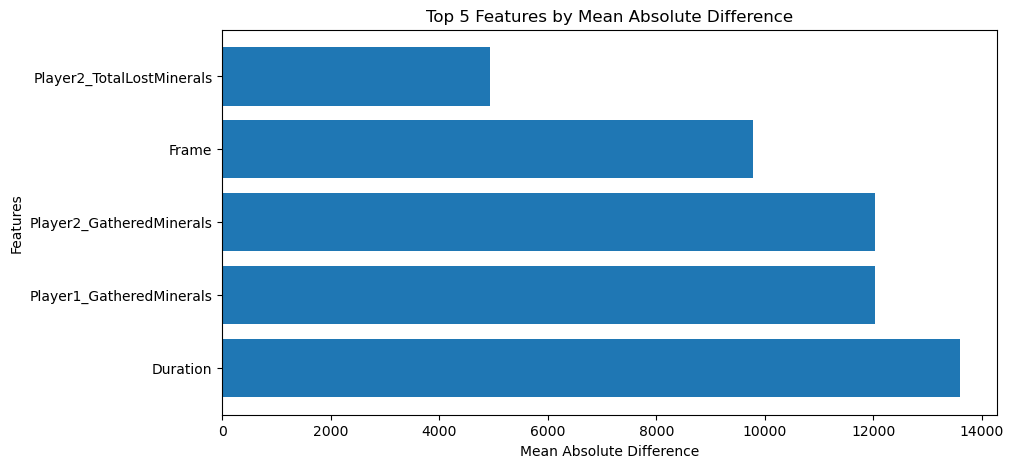

In [83]:
# Calculating Mean absolute difference
mean_abs_diff = np.sum(np.abs(X-np.mean(X,axis=0)),axis=0)/X.shape[0]
# Get top 5 features
top5_idx = np.argsort(mean_abs_diff)[::-1][:5]
top5_features = X.columns[top5_idx]

# Plot the top 5 features
plt.figure(figsize=(10, 5))
plt.barh(top5_features, mean_abs_diff[top5_idx])
plt.xlabel('Mean Absolute Difference')
plt.ylabel('Features')
plt.title('Top 5 Features by Mean Absolute Difference')
plt.show()
